In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tick_size = 25
label_size = 25
l_width = 4
l_plot_size = (16, 8)
lg_size = 20

# SISO Linear

In [4]:
def plot_linear_traj(x_pred, x_true, y_label='x', max_steps=None):
    x_pred = np.squeeze(x_pred)
    x_true = np.squeeze(x_true)
    if max_steps is None:
        max_steps = x_pred.shape[0]
    fig, ax = plt.subplots(figsize=l_plot_size)
    ax.plot(x_true, 'k', linewidth = lwidth, label = 'exact')
    ax.plot(x_pred[:max_steps], 'r--', linewidth = l_width, label = 'prediction')
    ax.axvspan(0, 15, facecolor='tab:gray', alpha=0.5)
    ax.legend(ncol=2, prop={'size': lg_size})
    ax.tick_params(axis='both', labelsize = tick_size)
    ax.set_xlabel('time steps', fontsize = label_size)
    ax.set_ylabel(y_label, fontsize = label_size)

In [34]:
siso_true = np.load('data/siso_test.npy')
siso_true = siso_true[0]

In [35]:
siso_exp = np.load('data/siso_exp_us.npy')

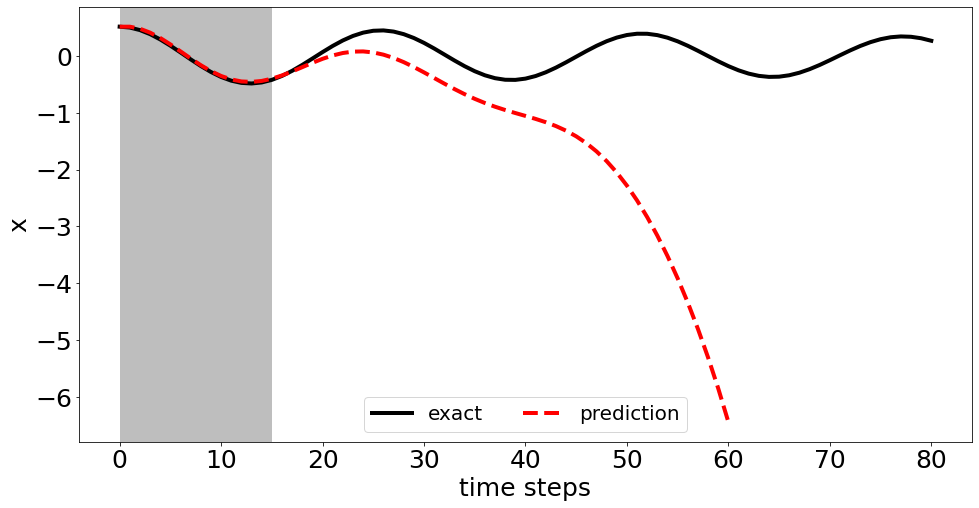

In [131]:
plot_linear_traj(siso_exp, siso_true)
plt.savefig('../Notes/pics/siso_expus.png')

In [37]:
siso_mus = np.load('data/siso_mid_us.npy')

In [48]:
from scipy import io
datamat = io.loadmat('../matlab/siso_long.mat')
siso_long_data = datamat['xs']

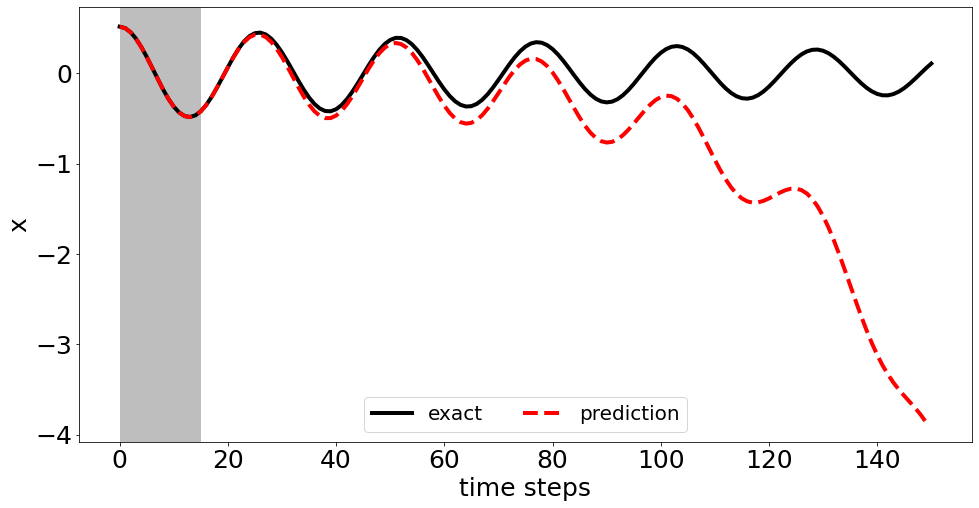

In [132]:
plot_linear_traj(siso_mus, siso_long_data, max_steps=150)
plt.savefig('../Notes/pics/siso_midus.png')

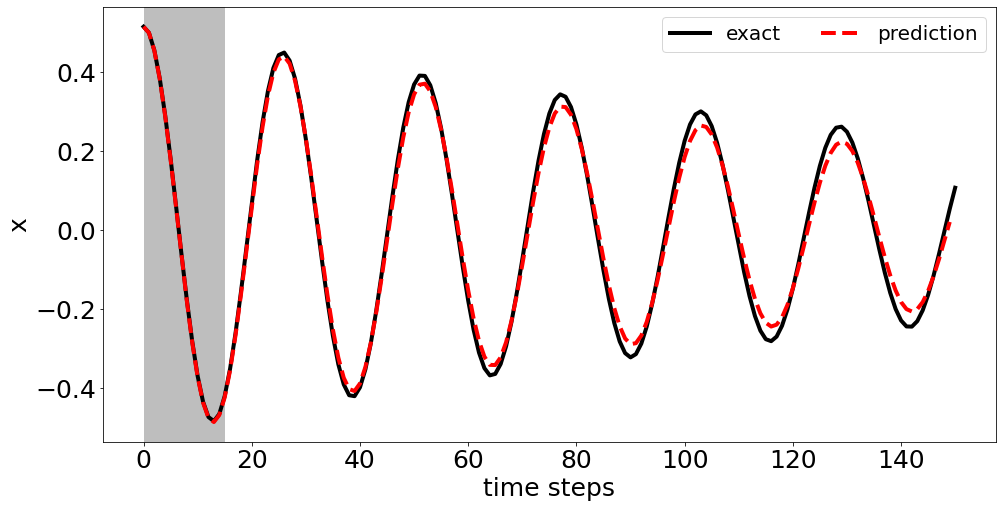

In [133]:
plot_linear_traj(siso_ms, siso_long_data, max_steps=150)
plt.savefig('../Notes/pics/siso_mids.png')

# MIMO Linear

In [28]:
err_s = np.load('data/err_stable.npy')
err_us = np.load('data/err_unstable.npy')

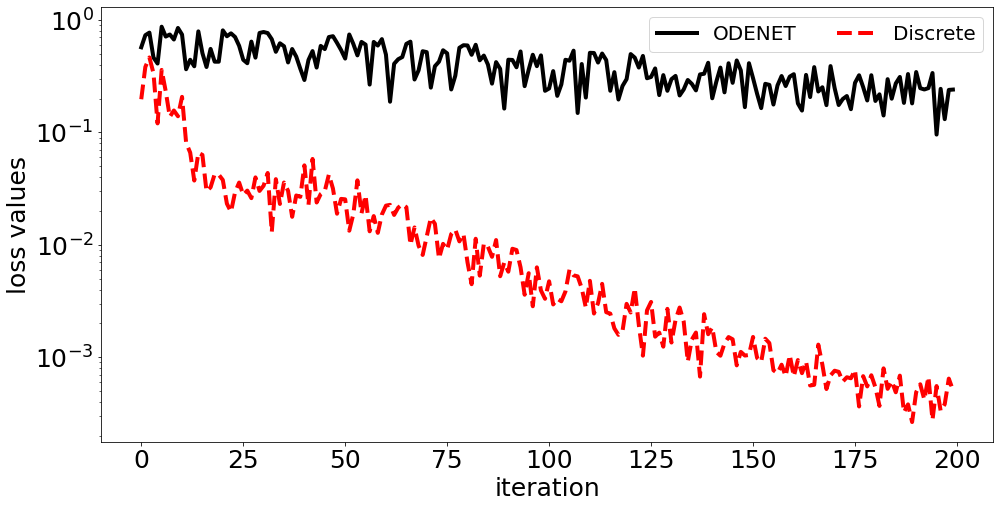

In [32]:
fig, ax = plt.subplots(figsize=l_plot_size)
ax.plot(err_us, 'k', linewidth = l_width, label = 'ODENET')
ax.plot(err_s[:200], 'r--', linewidth = l_width, label = 'Discrete')
ax.legend(ncol=2, prop={'size': lg_size})
ax.tick_params(axis='both', labelsize=tick_size)
ax.set_yscale('log')
ax.set_xlabel('iteration', fontsize = label_size)
ax.set_ylabel('loss values', fontsize = label_size)
plt.savefig('../Notes/pics/loss_odenet.png')

In [88]:
mimo_true = np.load('data/mimo_test.npy')
mimo_true = mimo_true[0]

In [89]:
mimo_pred = np.load('data/mimo_mid_pred.npy')

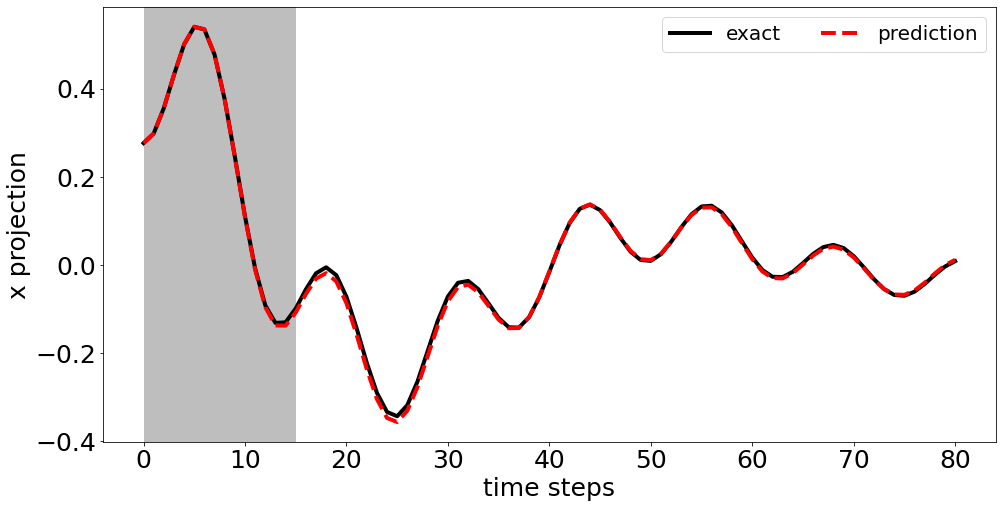

In [136]:
v_p = np.load('data/mimo_test_v1.npy')
plot_linear_traj(mimo_pred @ v_p, mimo_true @ v_p, y_label='x projection', max_steps=81)
plt.savefig('../Notes/pics/mimo_proj1.png')

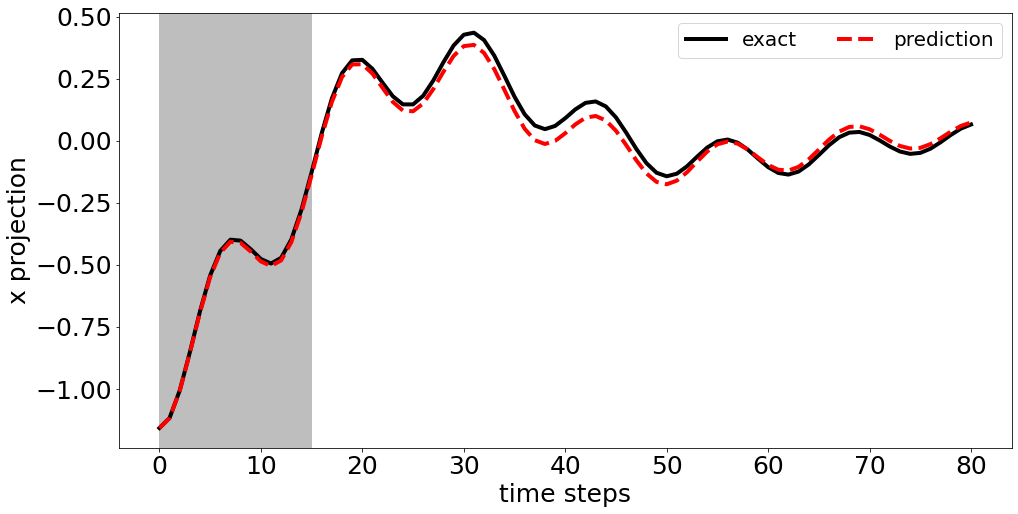

In [137]:
v_p = np.load('data/mimo_test_v2.npy')
plot_linear_traj(mimo_pred @ v_p, mimo_true @ v_p, y_label='x projection', max_steps=81)
plt.savefig('../Notes/pics/mimo_proj2.png')

# Rubberband

In [167]:
def plot_snapshots(x_test, x_pred, test_step, xlim=(0,1), ylim=(0,1)):
    xdim = x_test.shape[-1] //2 
    test_step = min(test_step, x_test.shape[0]-1)
    x_true = np.append(x_test[test_step,:xdim], x_test[test_step,0]) 
    y_true = np.append(x_test[test_step,xdim:], x_test[test_step,xdim])
    x_p = np.append(x_pred[test_step,:xdim], x_pred[test_step,0])
    y_p = np.append(x_pred[test_step,xdim:], x_pred[test_step,xdim])
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title(f"Time step: {test_step}", fontsize=label_size)
    ax.plot(x_true, y_true, 'k', linewidth=l_width, label="exact")
    ax.plot(x_p, y_p, 'r--', linewidth=l_width, label="prediction")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.legend(prop={'size': lg_size}, loc=1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [151]:
def plot_lerr(err, ts):
    fig, ax = plt.subplots(figsize=l_plot_size)
    ax.plot(err, 'k', linewidth = l_width)
    ax.axvspan(0, ts, facecolor='tab:gray', alpha=0.5)
    ax.set_ylabel('relative error of length (%)', fontsize=label_size)
    ax.set_xlabel('time steps', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)

In [35]:
def plot_loss(lossv):
    fig, ax = plt.subplots(figsize=l_plot_size)
    ax.plot(lossv, 'r', linewidth = l_width)
    ax.tick_params(axis='both', labelsize = tick_size)
    ax.set_xlabel('iteration', fontsize = label_size)
    ax.set_ylabel('loss_values', fontsize = label_size)

## linear force

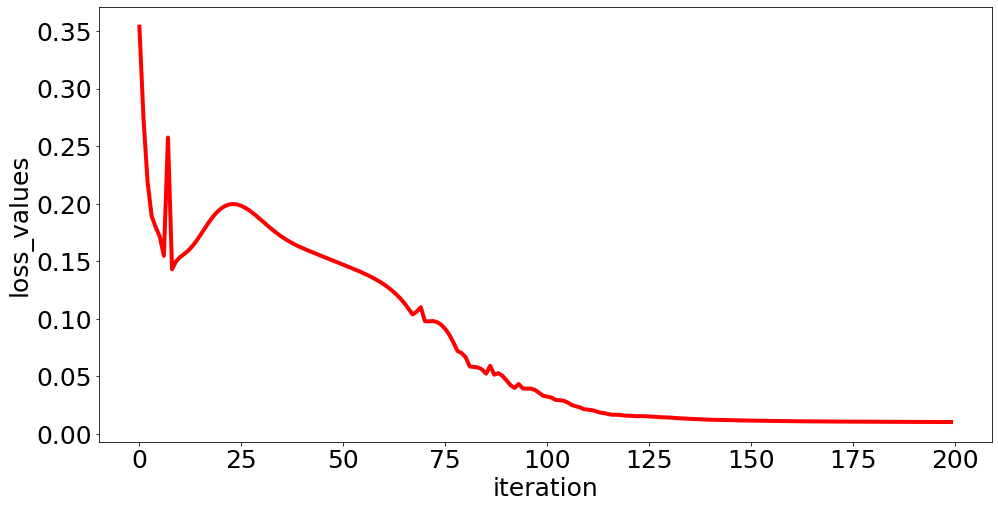

In [39]:
llv = np.load('data/rbl_batch_errs.npy')
plot_loss(llv[:200])
plt.savefig(f"../Notes/pics/rbl_loss.png")

In [140]:
rbl_test = np.load('data/rbl_test.npy')
rbl_test = rbl_test[0]
rbl_pred = np.load('data/rbl_pred.npy')

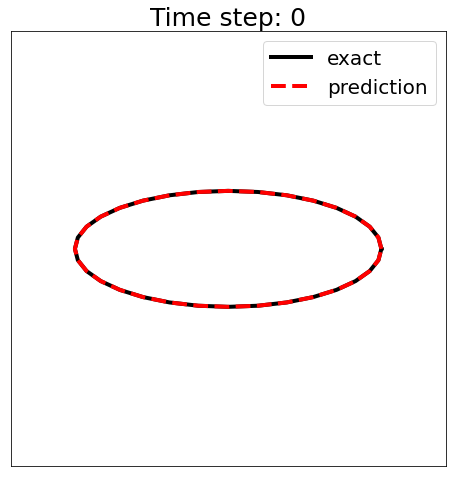

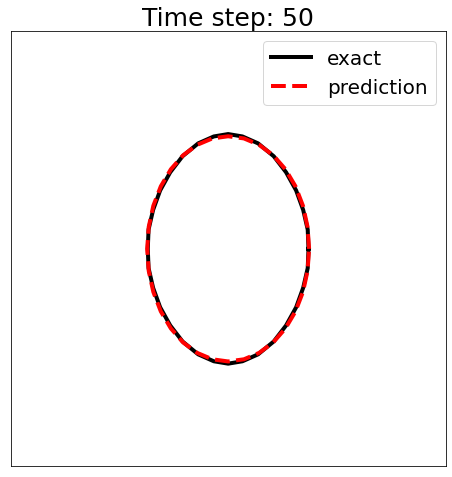

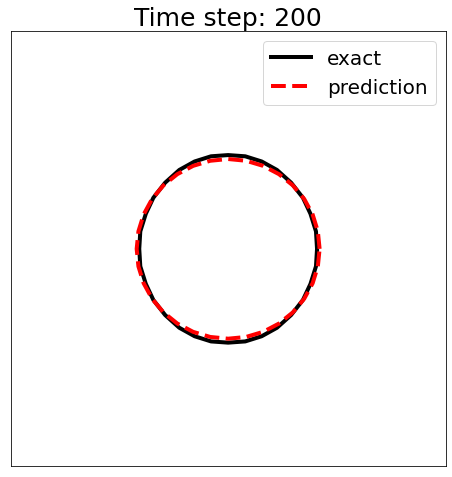

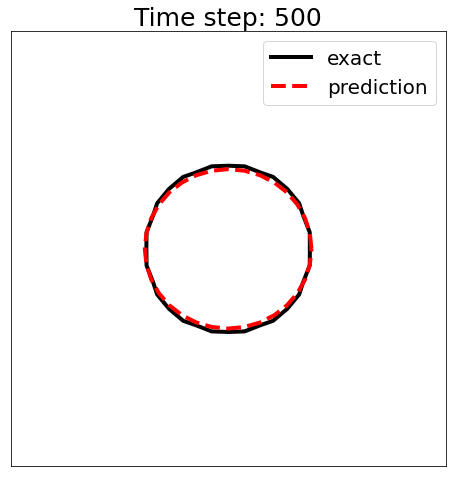

In [169]:
for test_step in [0, 50, 200, 500]:
    plot_snapshots(rbl_test, rbl_pred, test_step, (.2,.8), (.2,.8))
    plt.savefig(f"../Notes/pics/rbl_snap{test_step}.png")

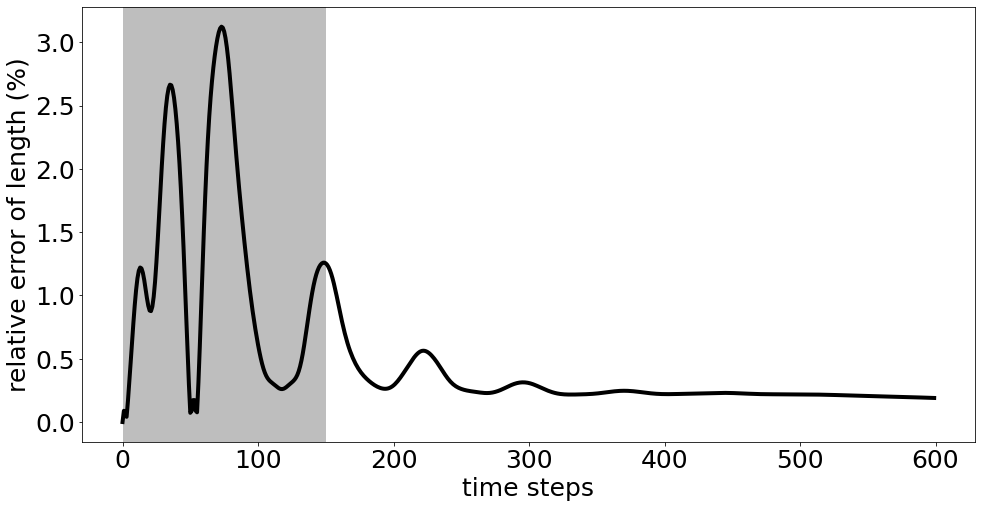

In [153]:
lerr = np.load('data/rbl_lerr.npy')
plot_lerr(lerr, 150)
plt.savefig("../Notes/pics/rbl_lens_err.png")

## nonlinear force

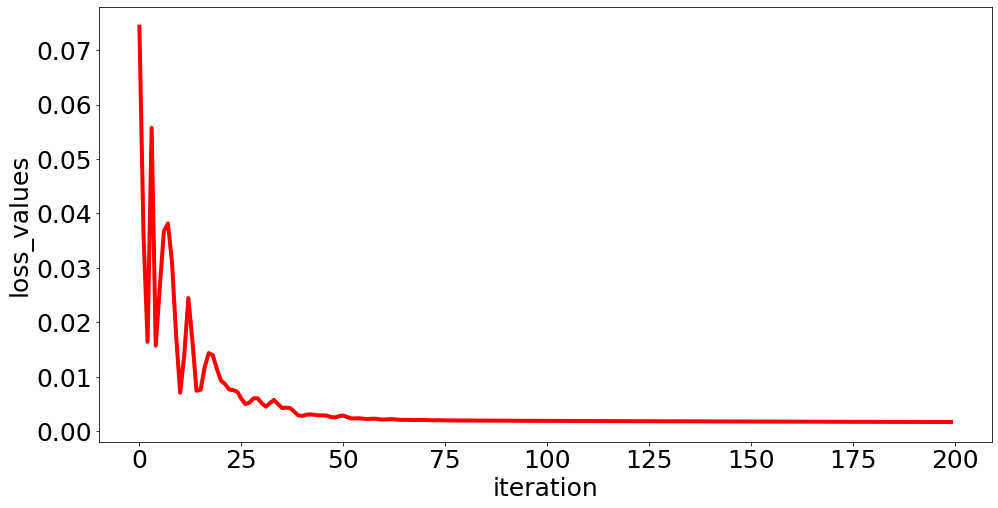

In [38]:
nllv = np.load('data/rbnl_batch_errs.npy')
plot_loss(nllv)
plt.savefig(f"../Notes/pics/rbnl_loss.png")

In [160]:
rbnl_test = np.load('data/rbnl_test.npy')
rbnl_test = rbnl_test[0]
rbnl_pred = np.load('data/rbnl_pred.npy')

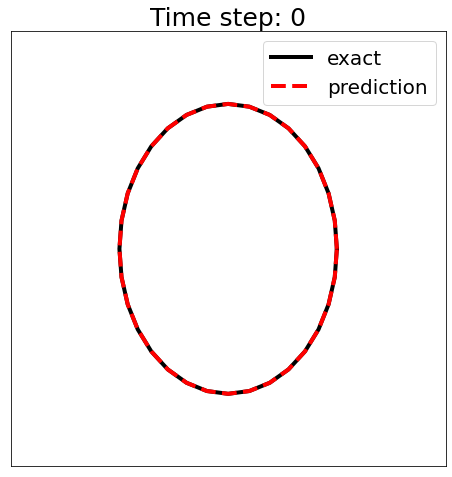

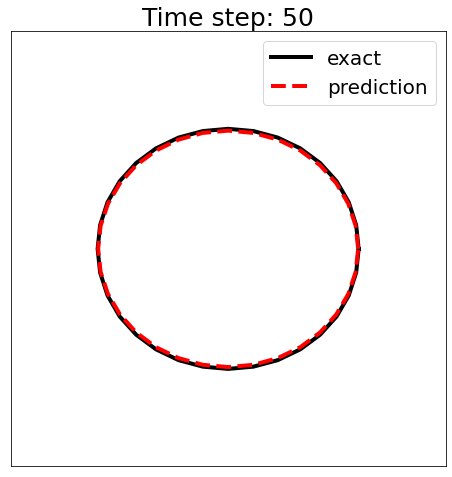

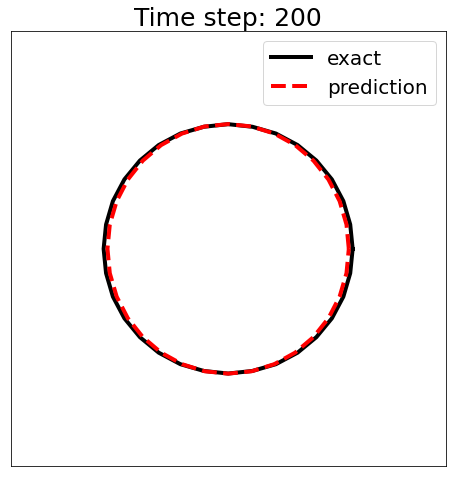

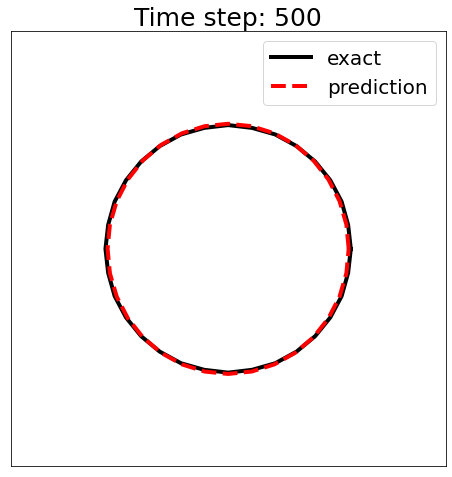

In [170]:
for test_step in [0, 50, 200, 500]:
    plot_snapshots(rbnl_test, rbnl_pred, test_step, (.2,.8), (.2,.8))
    plt.savefig(f"../Notes/pics/rbnl_snap{test_step}.png")

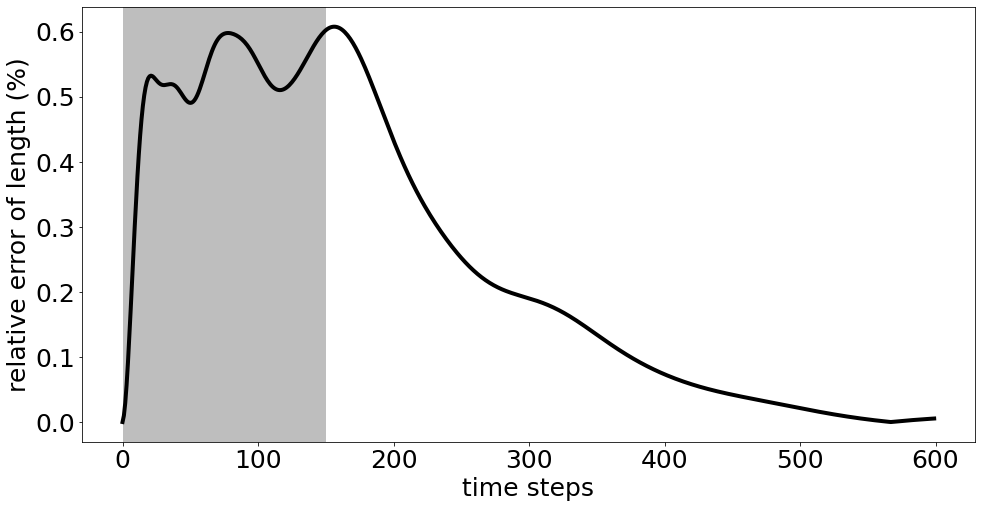

In [154]:
nlerr = np.load('data/rbnl_lerr.npy')
plot_lerr(nlerr, 150)
plt.savefig("../Notes/pics/rbnl_lens_err.png")

# Rotation

In [175]:
def compute_angle(x_pred, x_true, ts=300):
    xdim = x_true.shape[-1]
    tx = x_true[:,0]
    ty = x_true[:,xdim // 2]
    cxt = (x_true[:,0] + x_true[:,xdim // 4])/2
    cyt = (x_true[:,xdim // 8 * 5] + x_true[:,xdim // 8 * 7])/2
    px = x_pred[:,0]
    py = x_pred[:,xdim // 2]
    cxp = (x_pred[:,0] + x_pred[:,xdim // 4])/2
    cyp = (x_pred[:,xdim // 8 * 5] + x_pred[:,xdim // 8 * 7])/2
    ta = (ty-cyt)/(tx-cxt)
    tp = (py-cyp)/(px-cxp)
    
    fig, ax = plt.subplots(figsize=l_plot_size)
    ax.plot(np.arctan(ta), 'k', linewidth = lwidth, label = 'exact')
    ax.plot(np.arctan(tp), 'r--', linewidth = l_width, label = 'prediction')
    ax.axvspan(0, ts, facecolor='tab:gray', alpha=0.5)
    ax.legend(ncol=2, prop={'size': lg_size})
    ax.tick_params(axis='both', labelsize = tick_size)
    ax.set_xlabel('time steps', fontsize = label_size)
    ax.set_ylabel('angle (rad)', fontsize = label_size)

## No translation

In [163]:
roto_test = np.load('data/roto_test.npy')
roto_test = roto_test[0]
roto_pred = np.load('data/roto_pred.npy')

D:\miniconda3\envs\tf-gpu-mlor\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


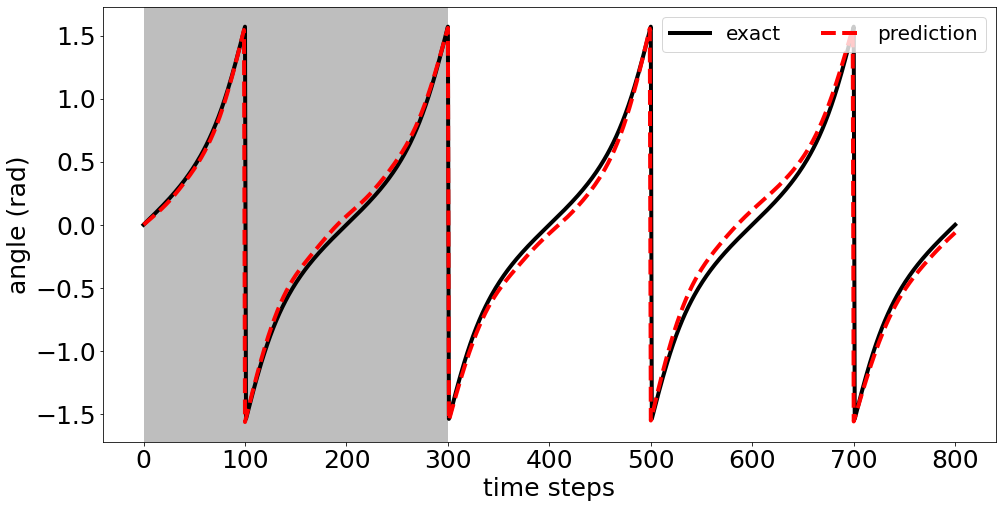

In [177]:
compute_angle(roto_pred, roto_test)
plt.savefig("../Notes/pics/roto_angle.png")

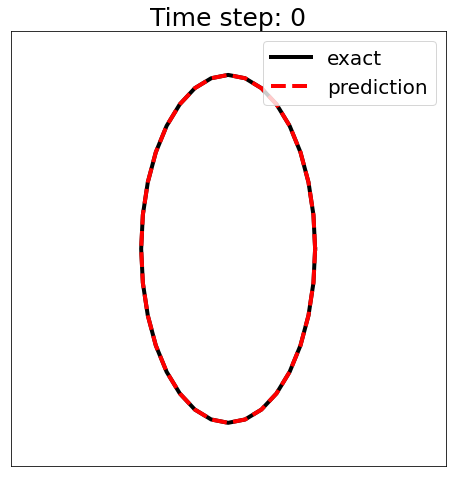

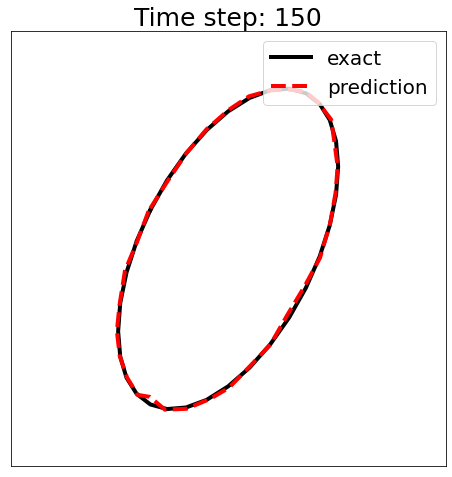

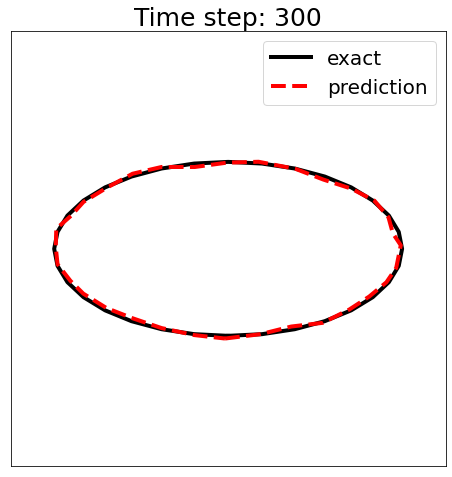

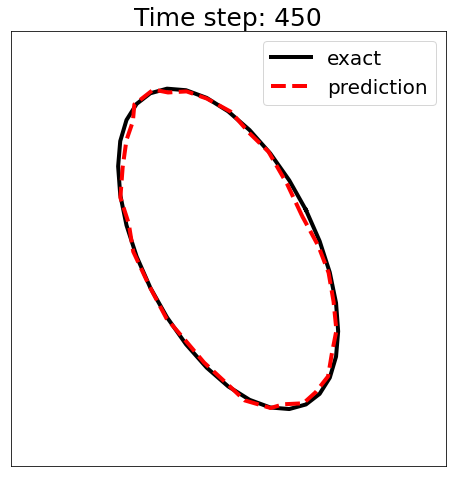

In [172]:
for test_step in [0, 150, 300, 450]:
    plot_snapshots(roto_test, roto_pred, test_step)
    plt.savefig(f"../Notes/pics/roto_snap{test_step}.png")

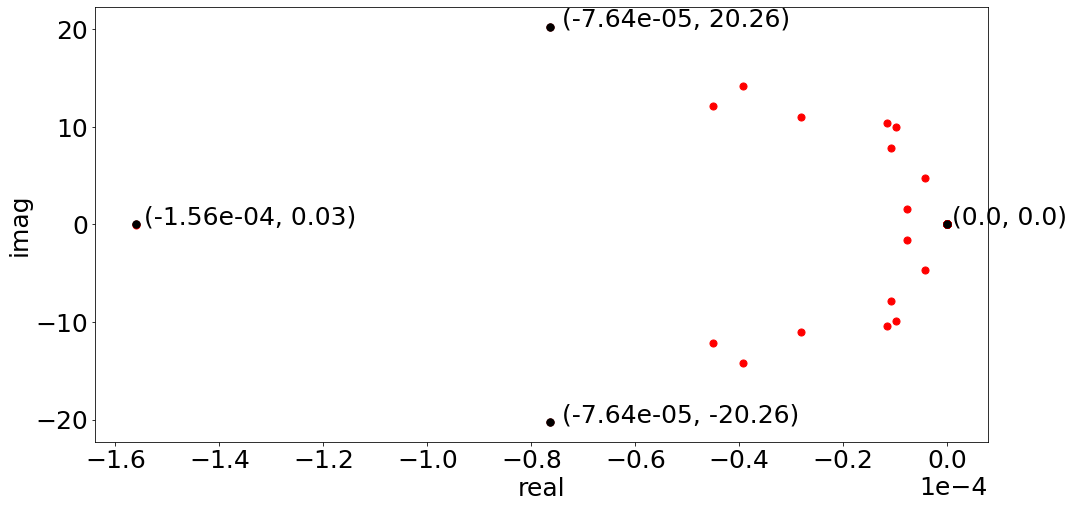

In [77]:
ct_eigs = np.load('data/rot_eigs.npy')
lid, rid = np.argmin(ct_eigs.real), np.argmax(ct_eigs.real)
uid, bid = np.argmax(ct_eigs.imag), np.argmin(ct_eigs.imag)
fig, ax = plt.subplots(figsize=l_plot_size)
ax.scatter(ct_eigs.real, ct_eigs.imag, c='r', s=50)
ax.scatter(ct_eigs.real[lid], ct_eigs.imag[lid], c='k', s=55)
ax.scatter(ct_eigs.real[uid], ct_eigs.imag[uid], c='k', s=55)
ax.scatter(ct_eigs.real[bid], ct_eigs.imag[bid], c='k', s=55)
ax.scatter(ct_eigs.real[rid], ct_eigs.imag[rid], c='k', s=55)
ax.text(ct_eigs.real[lid]*.99, ct_eigs.imag[lid], f"({ct_eigs.real[lid]:.2e}, {ct_eigs.imag[lid]:.2f})", fontsize=25)
ax.text(1e-6, ct_eigs.imag[rid], f"({ct_eigs.real[rid]:.1f}, {ct_eigs.imag[rid]:.1f})", fontsize=25)
ax.text(ct_eigs.real[uid]*.97, ct_eigs.imag[uid], f"({ct_eigs.real[uid]:.2e}, {ct_eigs.imag[uid]:.2f})", fontsize=25)
ax.text(ct_eigs.real[bid]*.97, ct_eigs.imag[bid], f"({ct_eigs.real[bid]:.2e}, {ct_eigs.imag[bid]:.2f})", fontsize=25)
ax.tick_params(axis='both', labelsize = tick_size)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-4, -4))
ax.set_xlabel('real', fontsize = label_size)
ax.set_ylabel('imag', fontsize = label_size)
ax.xaxis.get_offset_text().set_fontsize(25)
plt.savefig("../Notes/pics/rot_eigs.png")

## Translation

In [178]:
rott_test = np.load('data/rott_test.npy')
rott_test = rott_test[0]
rott_pred = np.load('data/rott_pred.npy')

D:\miniconda3\envs\tf-gpu-mlor\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


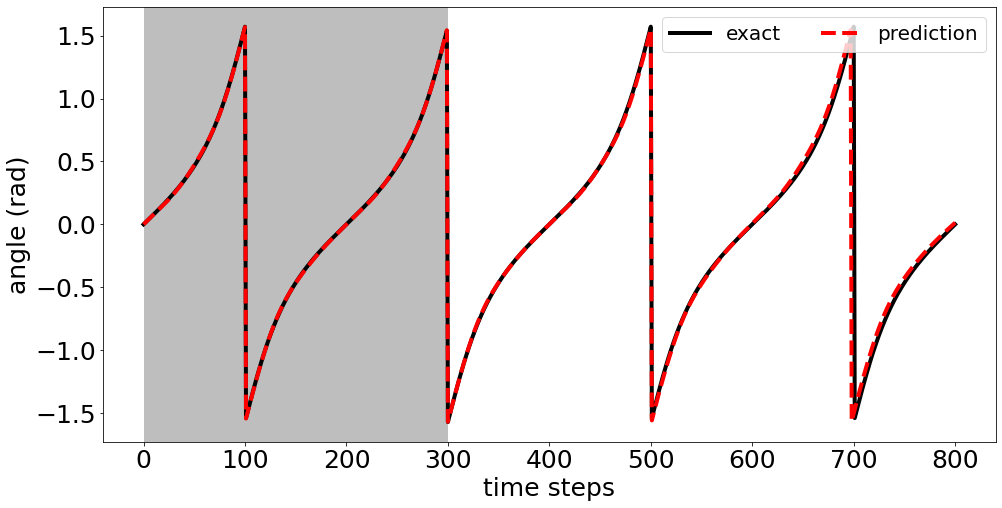

In [179]:
compute_angle(rott_pred, rott_test)
plt.savefig("../Notes/pics/rott_angle.png")

In [207]:
def plot_rott(x_test, x_pred, ids):
    xdim = x_test.shape[-1]
    x_ub = x_test[-1,:xdim//2].mean() + 0.5
    fig, ax = plt.subplots(figsize=(16,16/x_ub*1.2))
    
    for test_step in ids:
        x_true = np.append(x_test[test_step,:xdim//2], x_test[test_step,0]) 
        y_true = np.append(x_test[test_step,xdim//2:], x_test[test_step,xdim//2])
        x_p = np.append(x_pred[test_step,:xdim//2], x_pred[test_step,0])
        y_p = np.append(x_pred[test_step,xdim//2:], x_pred[test_step,xdim//2])
        lt, = ax.plot(x_true,y_true, 'k', linewidth = lwidth)
        lp, = ax.plot(x_p,y_p, 'r--', linewidth = l_width)
    ax.axvspan(0, x_ub//2, facecolor='tab:gray', alpha=0.5)
    ax.set_aspect('equal')
    ax.legend([lt, lp], ['exact', 'prediction'], ncol=2, loc=8, prop={'size': lg_size})
    ax.set_xlim(0, x_ub)
    ax.set_ylim(-0.2, 1)
    ax.set_xticks([])
    ax.set_yticks([])

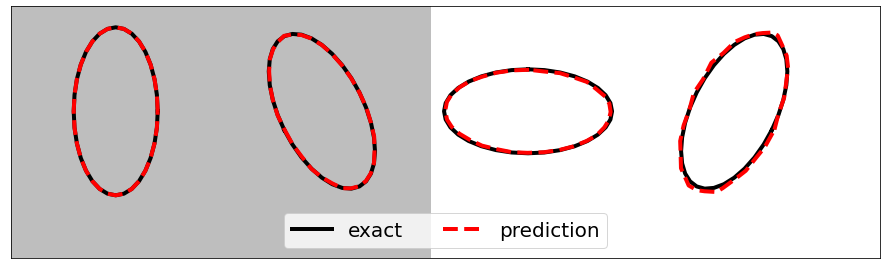

In [208]:
plot_rott(rott_test, rott_pred, [0, 250, 500, 750])
plt.savefig("../Notes/pics/rott_snaps.png")

In [209]:
def plot_center(x_pred, x_true):
    xdim = x_true.shape[-1]
    cxt = (x_true[:,0] + x_true[:,xdim // 4])/2
    cxp = (x_pred[:,0] + x_pred[:,xdim // 4])/2
    
    fig, ax = plt.subplots(figsize=l_plot_size)
    ax.plot(cxt-cxt[0], 'k', linewidth = lwidth, label = 'exact')
    ax.plot(cxp-cxp[0], 'r--', linewidth = l_width, label = 'prediction')
    ax.axvspan(0, 300, facecolor='tab:gray', alpha=0.5)
    ax.legend(ncol=2, prop={'size': lg_size})
    ax.tick_params(axis='both', labelsize = tick_size)
    ax.set_xlabel('time steps', fontsize = label_size)
    ax.set_ylabel('translation', fontsize = label_size)

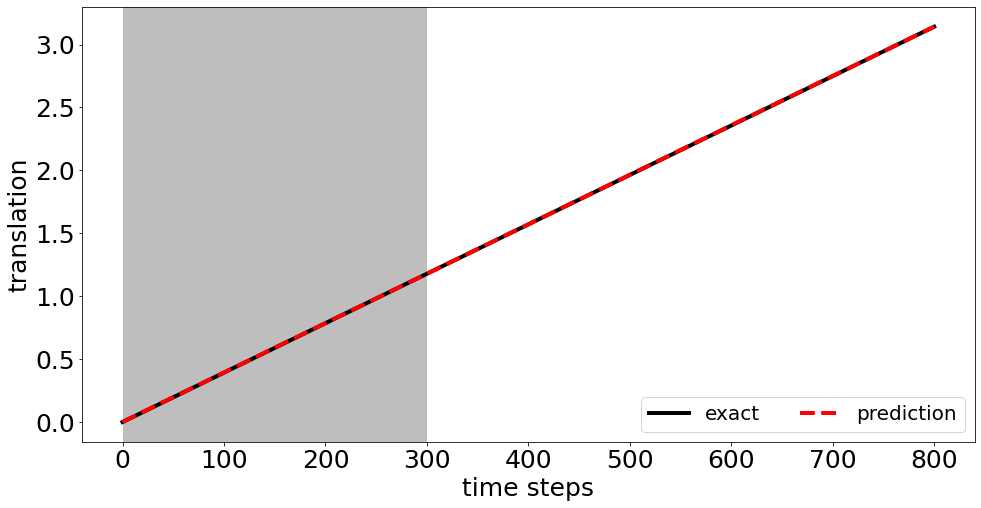

In [211]:
plot_center(rott_pred, rott_test)
plt.savefig("../Notes/pics/rott_disp.png")